#  <font color = red> Analysis Of Previous Application Data 

### <font color = darkblue>  Importing Required Libraries


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objects as go
import plotly
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500) # to display all the columns
pd.set_option('display.max_rows', 10000) # to display all the rows
pd.set_option('display.width', 1000)

### <font color = darkblue>  Reading the Previous Application Data 

In [2]:
PAD= pd.read_csv(r"C:\Users\saket\Desktop\Python exercise\eda group study\previous_application.csv")

### <font color = darkblue>  Examining the Previous Application data 

In [3]:
PAD.head(3)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0

In [4]:
PAD.shape

(1670214, 37)

In [5]:
PAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### <font color = darkblue>  Checking Summary of Numeric Columns

In [6]:
PAD.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [7]:
# Check the SK_ID_CURR column.
PAD.SK_ID_CURR.value_counts()


187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

### <font color=purple>Inference</font>
<font color=Teal>One current loan can have 0,1 or more previous loan applications in Home Credit.</font>

### <font color = darkblue> Checking for Null Values

In [8]:
#List of columns having Null value in it
Null_value_columns=PAD.columns[PAD.isnull().any()].tolist()
Null_value_columns


['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [9]:
#Calculating the percentage of null value in every column
(100*PAD[Null_value_columns].isnull().sum()/len(PAD)).round(4).sort_values(ascending = False)

RATE_INTEREST_PRIMARY        99.6437
RATE_INTEREST_PRIVILEGED     99.6437
AMT_DOWN_PAYMENT             53.6365
RATE_DOWN_PAYMENT            53.6365
NAME_TYPE_SUITE              49.1198
DAYS_FIRST_DRAWING           40.2981
DAYS_FIRST_DUE               40.2981
DAYS_LAST_DUE_1ST_VERSION    40.2981
DAYS_LAST_DUE                40.2981
DAYS_TERMINATION             40.2981
NFLAG_INSURED_ON_APPROVAL    40.2981
AMT_GOODS_PRICE              23.0818
AMT_ANNUITY                  22.2867
CNT_PAYMENT                  22.2864
PRODUCT_COMBINATION           0.0207
AMT_CREDIT                    0.0001
dtype: float64

### <font color=purple>Inference</font>
<font color=Teal>We can see that there are a lot of columns having more than 45% missing value. We will be droping the columns having more that 45% missing value.</font>

### <font color = darkblue> Dealing with missing value

In [10]:
#Dropping the columns having more than 45 % missing values
PAD = PAD.loc[:,PAD.isnull().mean()<=0.45]
PAD.shape

(1670214, 32)

In [11]:
# See the application data after dropping the columns having null values more than 45%
PAD.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN

In [12]:
#Columns left with missing value after dropping the columns havig more than 45% missing values 
Null_value_columns=PAD.columns[PAD.isnull().any()].tolist()
(100*PAD[Null_value_columns].isnull().sum()/len(PAD)).round(4).sort_values(ascending = False)

DAYS_FIRST_DRAWING           40.2981
DAYS_FIRST_DUE               40.2981
DAYS_LAST_DUE_1ST_VERSION    40.2981
DAYS_LAST_DUE                40.2981
DAYS_TERMINATION             40.2981
NFLAG_INSURED_ON_APPROVAL    40.2981
AMT_GOODS_PRICE              23.0818
AMT_ANNUITY                  22.2867
CNT_PAYMENT                  22.2864
PRODUCT_COMBINATION           0.0207
AMT_CREDIT                    0.0001
dtype: float64

### <font color = darkblue> Dealing with Invalid Data

In [13]:
# Replace XNA and XAP with NaN
PAD=PAD.replace('XNA', np.NaN)
PAD=PAD.replace('XAP', np.NaN)

### <font color = darkblue> Analysis

<font color = green>Univariate Analysis (Categorical)


In [14]:
# Check all columns again to find categorical data
PAD.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null    object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

NAME_CONTRACT_STATUS

In [15]:
# See values of Contract Status
PAD['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

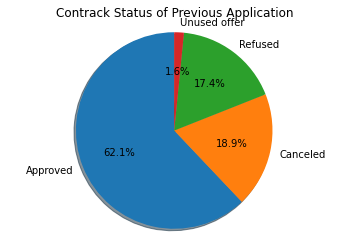

In [16]:
x=PAD['NAME_CONTRACT_STATUS'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Contrack Status of Previous Application')
plt.axis('equal')
plt.show();

### <font color=purple>Inference</font>
<font color=Teal>Most applications were approved. Only a very small percentage of applications was unused offer.</font>

NAME_CONTRACT_TYPE

In [17]:
# Check values of NAME_CONTRACT_TYPE
PAD.NAME_CONTRACT_TYPE.value_counts()


Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

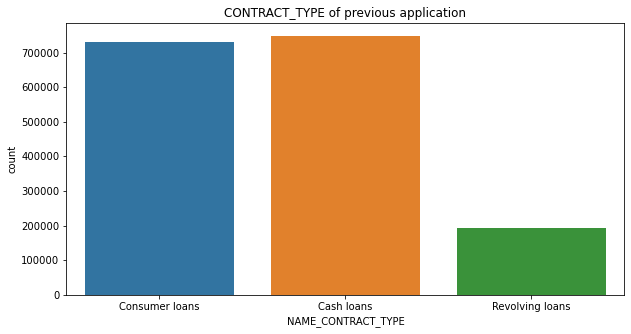

In [18]:
# Plot on charts
plt.figure(figsize=(10,5))
plt.title('CONTRACT_TYPE of previous application')
sns.countplot(x='NAME_CONTRACT_TYPE',data=PAD)

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>Number of applications for consumer loans and cash loans  are greater than revolving loans.</font>

REASONS FOR REJECTING APPLICATIONS

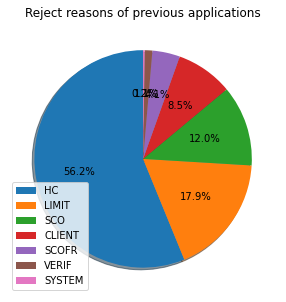

In [19]:
# Plot on a pie chart
plt.figure(figsize=(10,5))
data = PAD["CODE_REJECT_REASON"].value_counts()
labels = data.index
plt.pie(data, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Reject reasons of previous applications')
plt.legend(labels, loc="lower left")

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>Most of application was rejected because of HC.</font>

CLIENT TYPES

Was the client old or new client when applying for the previous application?



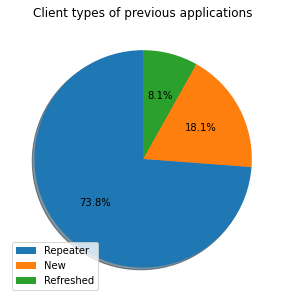

In [20]:
# Plot on a pie chart
plt.figure(figsize=(10,5))
data =PAD["NAME_CLIENT_TYPE"].value_counts()
labels = data.index
plt.pie(data, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Client types of previous applications')
plt.legend(labels, loc="lower left")

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>Most of the client are Repeater.</font>

TYPE OF PORTFOLIO

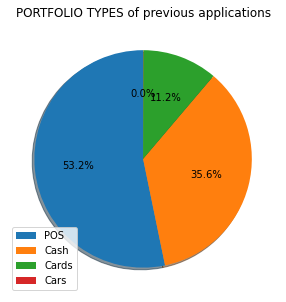

In [21]:
# Plot on a pie chart
plt.figure(figsize=(10,5))
data = PAD["NAME_PORTFOLIO"].value_counts()
labels = data.index
plt.pie(data, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('PORTFOLIO TYPES of previous applications')
plt.legend(labels, loc="lower left")

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>Most of the Previous Application was POS.</font>

PAYMENT METHODS

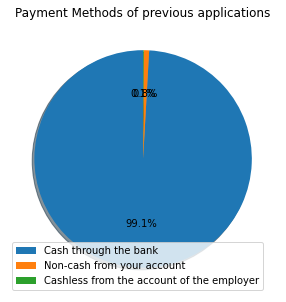

In [22]:
# Plot on a pie chart
plt.figure(figsize=(10,5))
data = PAD["NAME_PAYMENT_TYPE"].value_counts()
labels = data.index
plt.pie(data, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Payment Methods of previous applications')
plt.legend(labels, loc="lower left")

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>99% client paid cash through the bank</font>

WEEK DAY

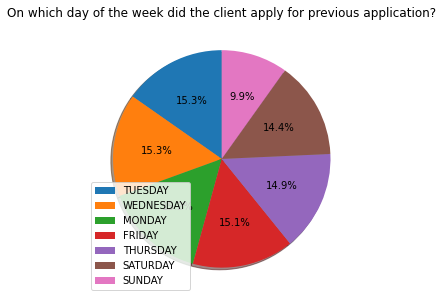

In [23]:
 #Plot on a pie chart
plt.figure(figsize=(10,5))
data = PAD["WEEKDAY_APPR_PROCESS_START"].value_counts()
labels = data.index
plt.pie(data, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('On which day of the week did the client apply for previous application?')
plt.legend(labels, loc="lower left")

plt.show()

### <font color=purple>Inference</font>
<font color=Teal>There were less applications on weekends than on the week days.</font>

GOODS CATEGORY

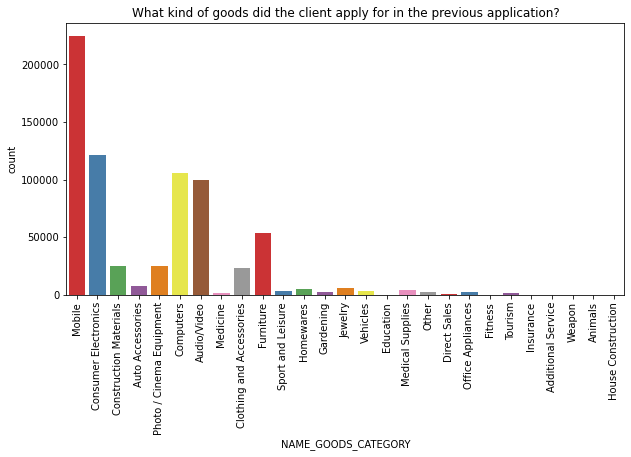

In [24]:
# Plot on a bar chart
plt.figure(figsize=(10,5))
plt.title('What kind of goods did the client apply for in the previous application?')
sns.countplot(x="NAME_GOODS_CATEGORY",data=PAD,palette='Set1')
plt.xticks(rotation=90)
plt.show()

### <font color=purple>Inference</font>
<font color=Teal>The majority of clients applied for mobiles, consumer electronics, computers, audio/video and furnitures.</font>

<font color = green>Univariate Analysis (Continuous)


In [25]:
# Check all columns again to find categorical data
PAD.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null    object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [26]:
def plot_univariate(variable):
    
    # Get data
    data = PAD[variable]

    # Plot on 2 charts side by side
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

    # Use distplot from seaborn
    ax1.set_title('Distribution Plot')
    sns.distplot(data,ax=ax1)
    
    # Use Box plot
    ax2.set_title('Box Plot')
    sns.boxplot(x=data)

    plt.show()

Credit Amount

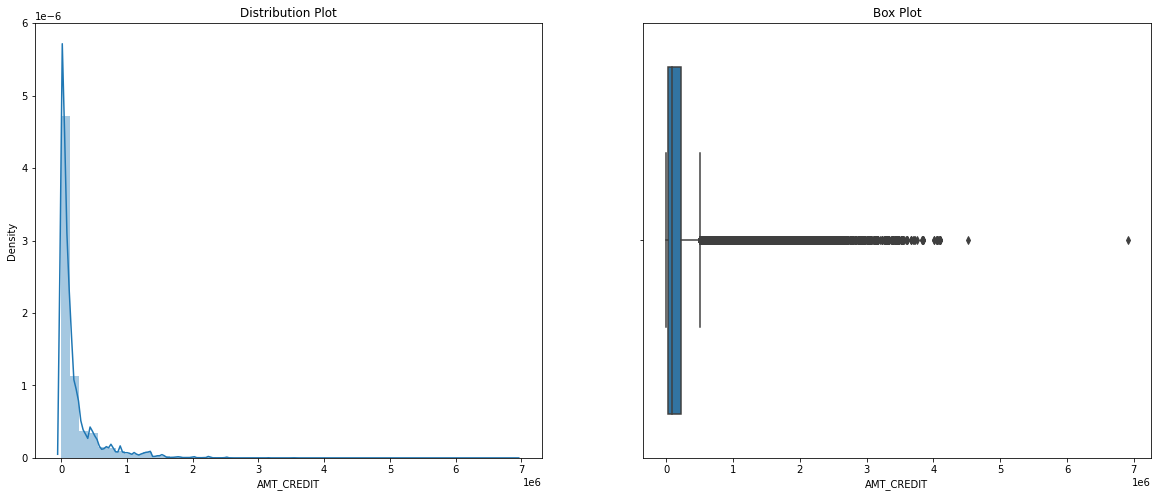

In [27]:
# Distribution and Box plot for 'AMT_CREDIT'
plot_univariate('AMT_CREDIT')

### <font color=purple>Inference</font>
<font color=Teal>There are some outliers. Most of the amount of the credit was less than 500000.</font>

Annuity Amount

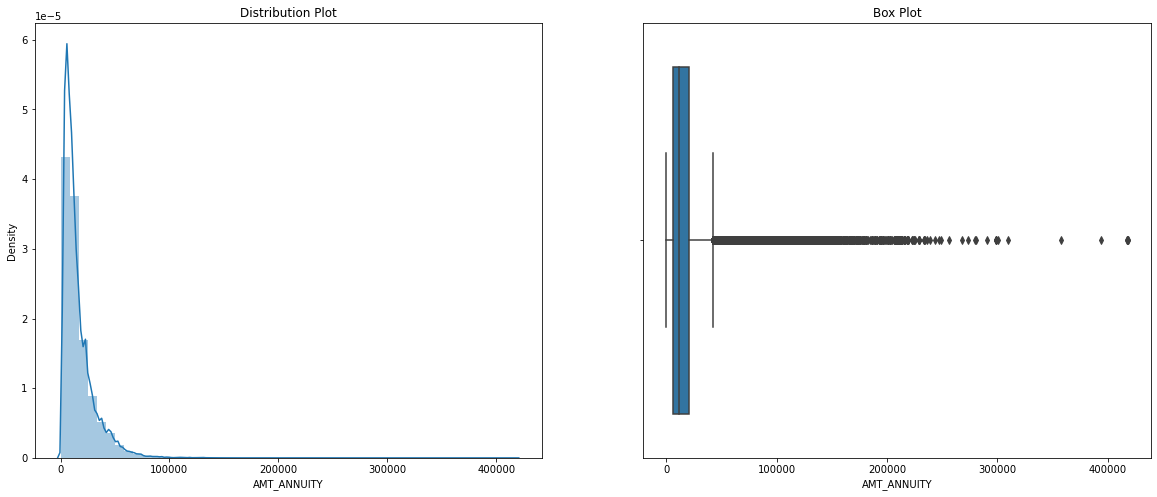

In [28]:
# Distribution and Box plot for 'AMT_ANNUITY'
plot_univariate('AMT_ANNUITY')

### <font color=purple>Inference</font>
<font color=Teal>There are some outliers. Most of the amount of the annuity was less than 500000. Similar to amount of credit amount</font>

Goods Price Amount

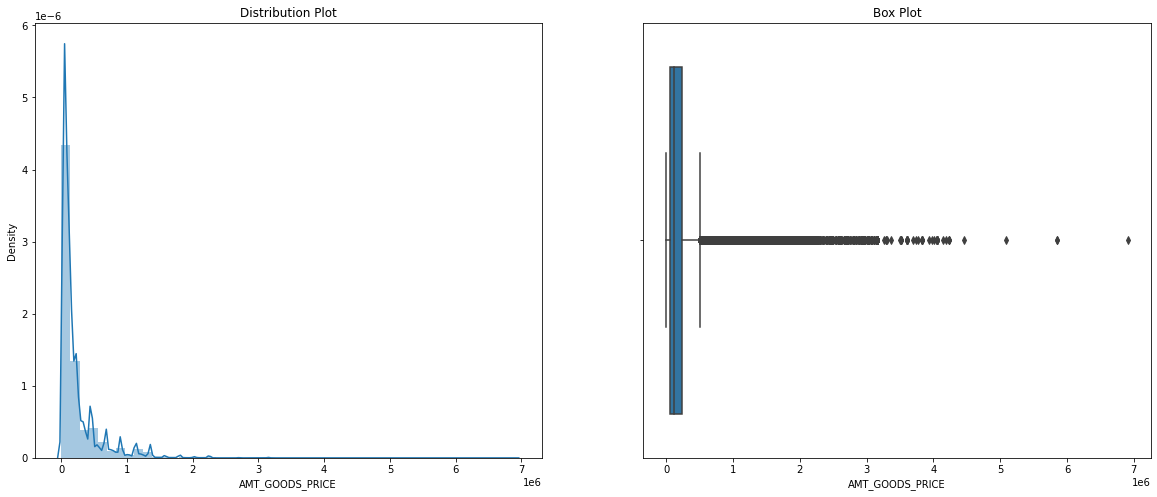

In [29]:
# Distribution and Box plot for 'AMT_GOODS_PRICE'
plot_univariate('AMT_GOODS_PRICE')

### <font color=purple>Inference</font>
<font color=Teal>There are some outliers. Most of the amount of the annuity was less than 500000. Similar to amount of credit amount</font>

### <font color = darkblue> Checking the correlation in the PreviousApplication dataset

In [30]:
#Getting the top 10 correlation PreviousApplication
corr=PAD.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1             Column2  Correlation  Abs_Correlation
88             AMT_GOODS_PRICE     AMT_APPLICATION     0.999884         0.999884
89             AMT_GOODS_PRICE          AMT_CREDIT     0.993087         0.993087
71                  AMT_CREDIT     AMT_APPLICATION     0.975824         0.975824
269           DAYS_TERMINATION       DAYS_LAST_DUE     0.927990         0.927990
87             AMT_GOODS_PRICE         AMT_ANNUITY     0.820895         0.820895
70                  AMT_CREDIT         AMT_ANNUITY     0.816429         0.816429
53             AMT_APPLICATION         AMT_ANNUITY     0.808872         0.808872
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING    -0.803494         0.803494
173                CNT_PAYMENT     AMT_APPLICATION     0.680630         0.680630
174                CNT_PAYMENT          AMT_CREDIT     0.674278         0.674278

### <font color = darkblue> Using pairplot to perform bivariate analysis on numerical columns

<Figure size 1440x576 with 0 Axes>

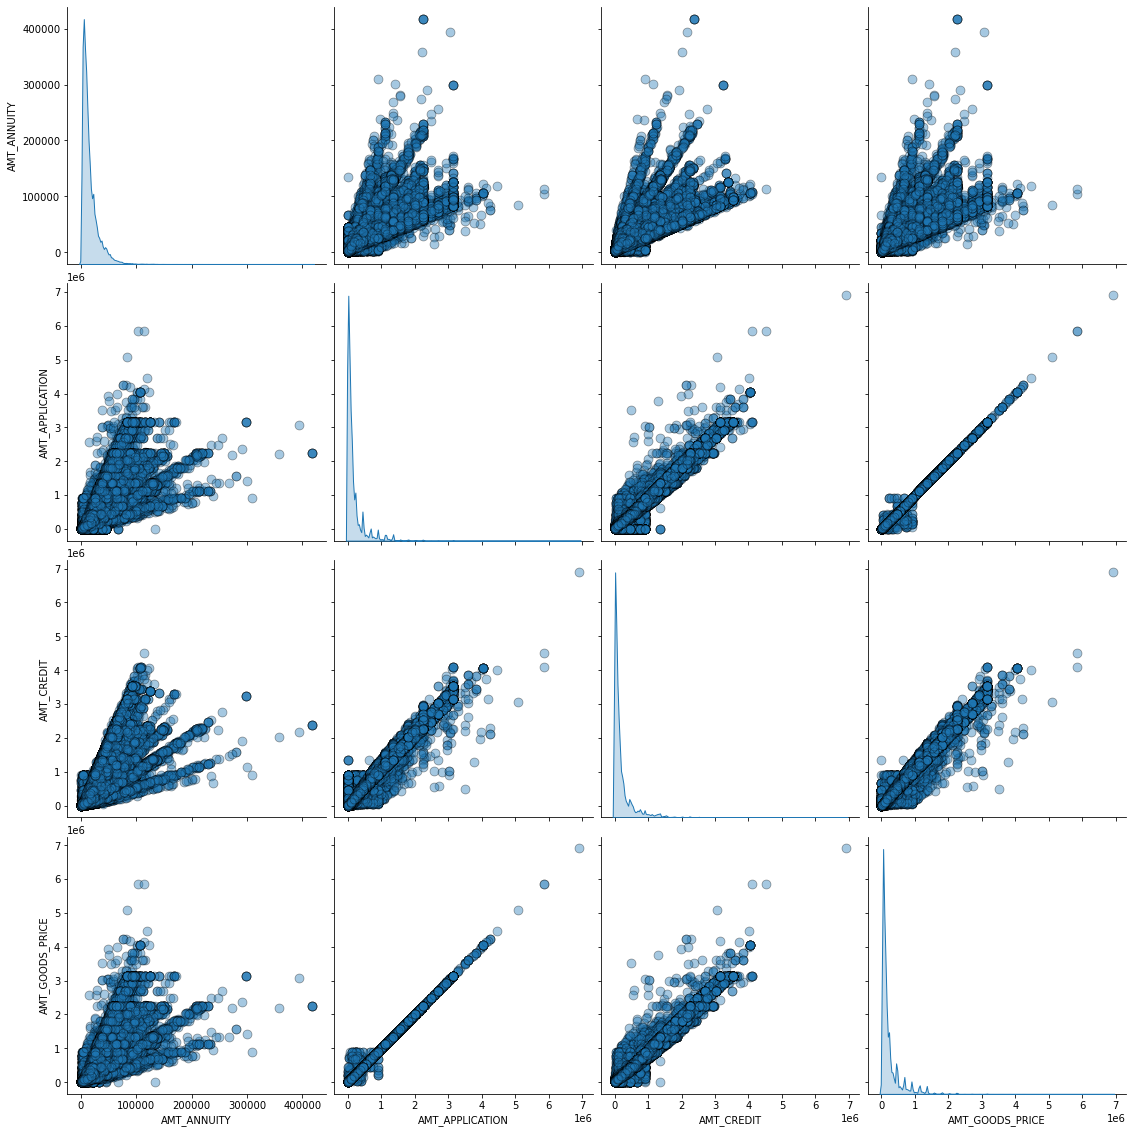

In [31]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(PAD[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

### <font color=purple>Inference</font>
<font color=Teal>Annuity of previous application has a very high and positive influence over (Increase of annuity increases below factors): 

(1) How much credit did client asked on the previous application
    

(2)Final credit amount on the previous application that was approved by the bank

(3) Goods price of good that client asked for on the previous application.

For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.
</font>

### <font color = darkblue> Box plot to do some more bivariate analysis on categorical vs numeric columns

In [32]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=PAD)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

'NAME_CONTRACT_STATUS' & 'AMT_ANNUITY'

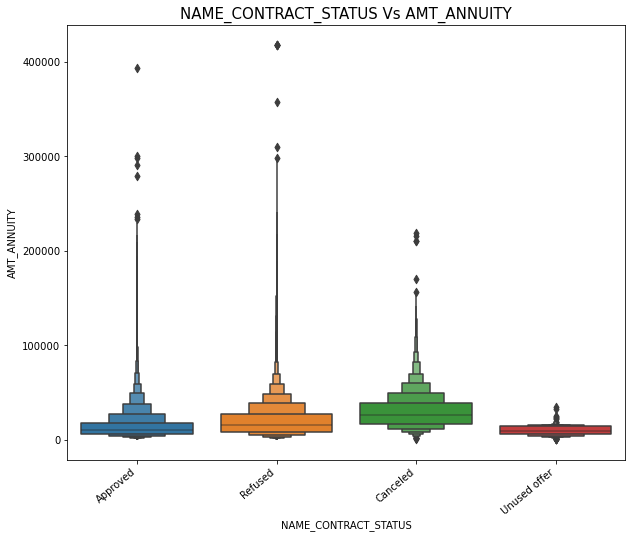

In [33]:
#by-varient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

### <font color=purple>Inference</font>
<font color=Teal>We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.
</font>

# <font color = red> Analyse Application data together with Previous Application data

In [34]:
AD= pd.read_csv(r"C:\Users\saket\GfG.csv")

In [35]:
AD=AD.loc[:,'SK_ID_CURR':]

In [36]:
AD.shape

(246872, 84)

In [37]:
AD.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801           -637            -3648.0            -2120          Y              Y               N                Y          Y          N        Laborers              1.0                     2                            2                  WEDNESDAY                       10                          N                          N                           N                      N                      N                       N  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                  No                         2                         2   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541          -1188            -1186.0             -291          Y              Y               N                Y          Y          N      Core staff              2.0                     1                            1                     MONDAY                       11                          N                          N                           N                      N                      N                       N                  School      0.622246           NaN                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                  No                         1                         0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032           -225            -4260.0            -2531          Y              Y               Y                Y          Y          N        Laborers              1.0                     2                            2                     MONDAY                        9                          N                          N                           N                      N                      N                       N              Government      0.555912      0.729567                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                 NaN                         0                         0   
3      100006       0         Cash loans           

In [38]:
PAD.shape

(1670214, 32)

In [39]:
PAD.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    NaN             Approved            -73  Cash through the bank                NaN         Repeater              Mobile            POS               NaN             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    NaN             Approved           -164                    NaN                NaN         Repeater                 NaN           Cash            x-sell           Contact center                -1                  NaN         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    NaN             Approved           -301  Cash through the bank                NaN         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    NaN             Approved           -512  Cash through the bank                NaN         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 NaN           Cash           walk-in  Credit and cash offices                -1                  NaN         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN

### <font color=purple>Inference</font>
<font color=Teal>Notice that there are some columns of Application and Previous Application have the same names.
Change names of those columns in Previous Application data.</font>

In [40]:
# Add "Previous" to the column names of Previous Application data
PAD.columns = PAD.columns + "_PREV"

In [41]:
PAD.columns

Index(['SK_ID_PREV_PREV', 'SK_ID_CURR_PREV', 'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION_PREV', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT_PREV', 'NFLAG_LAST_APPL_IN_DAY_PREV', 'NAME_CASH_LOAN_PURPOSE_PREV', 'NAME_CONTRACT_STATUS_PREV', 'DAYS_DECISION_PREV', 'NAME_PAYMENT_TYPE_PREV', 'CODE_REJECT_REASON_PREV', 'NAME_CLIENT_TYPE_PREV', 'NAME_GOODS_CATEGORY_PREV', 'NAME_PORTFOLIO_PREV', 'NAME_PRODUCT_TYPE_PREV', 'CHANNEL_TYPE_PREV', 'SELLERPLACE_AREA_PREV', 'NAME_SELLER_INDUSTRY_PREV', 'CNT_PAYMENT_PREV', 'NAME_YIELD_GROUP_PREV', 'PRODUCT_COMBINATION_PREV', 'DAYS_FIRST_DRAWING_PREV', 'DAYS_FIRST_DUE_PREV', 'DAYS_LAST_DUE_1ST_VERSION_PREV', 'DAYS_LAST_DUE_PREV', 'DAYS_TERMINATION_PREV', 'NFLAG_INSURED_ON_APPROVAL_PREV'], dtype='object')

In [42]:
# Remove "Previous" from the previous_SK_ID_PREV and previous_SK_ID_CURR columns
PAD.rename({'SK_ID_PREV_PREV': 'SK_ID_PREV', 'SK_ID_CURR_PREV': 'SK_ID_CURR'}, axis=1, inplace=True)

In [43]:
PAD.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION_PREV  AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV WEEKDAY_APPR_PROCESS_START_PREV  HOUR_APPR_PROCESS_START_PREV FLAG_LAST_APPL_PER_CONTRACT_PREV  NFLAG_LAST_APPL_IN_DAY_PREV NAME_CASH_LOAN_PURPOSE_PREV NAME_CONTRACT_STATUS_PREV  DAYS_DECISION_PREV NAME_PAYMENT_TYPE_PREV CODE_REJECT_REASON_PREV NAME_CLIENT_TYPE_PREV NAME_GOODS_CATEGORY_PREV NAME_PORTFOLIO_PREV NAME_PRODUCT_TYPE_PREV        CHANNEL_TYPE_PREV  SELLERPLACE_AREA_PREV NAME_SELLER_INDUSTRY_PREV  CNT_PAYMENT_PREV NAME_YIELD_GROUP_PREV  PRODUCT_COMBINATION_PREV  DAYS_FIRST_DRAWING_PREV  DAYS_FIRST_DUE_PREV  DAYS_LAST_DUE_1ST_VERSION_PREV  DAYS_LAST_DUE_PREV  DAYS_TERMINATION_PREV  NFLAG_INSURED_ON_APPROVAL_PREV
0     2030495      271877          Consumer loans          1730.430               17145.0          17145.0               17145.0                        SATURDAY                            15                                Y                            1                         NaN                  Approved                 -73  Cash through the bank                     NaN              Repeater                   Mobile                 POS                    NaN             Country-wide                     35              Connectivity              12.0                middle  POS mobile with interest                 365243.0                -42.0                           300.0               -42.0                  -37.0                             0.0
1     2802425      108129              Cash loans         25188.615              607500.0         679671.0              607500.0                        THURSDAY                            11                                Y                            1                         NaN                  Approved                -164                    NaN                     NaN              Repeater                      NaN                Cash                 x-sell           Contact center                     -1                       NaN              36.0            low_action          Cash X-Sell: low                 365243.0               -134.0                           916.0            365243.0               365243.0                             1.0
2     2523466      122040              Cash loans         15060.735              112500.0         136444.5              112500.0                         TUESDAY                            11                                Y                            1                         NaN                  Approved                -301  Cash through the bank                     NaN              Repeater                      NaN                Cash                 x-sell  Credit and cash offices                     -1                       NaN              12.0                  high         Cash X-Sell: high                 365243.0               -271.0                            59.0            365243.0               365243.0                             1.0
3     2819243      176158              Cash loans         47041.335              450000.0         470790.0              450000.0                          MONDAY                             7                                Y                            1                         NaN                  Approved                -512  Cash through the bank                     NaN              Repeater                      NaN                Cash                 x-sell  Credit and cash offices                     -1                       NaN              12.0                middle       Cash X-Sell: middle                 365243.0               -482.0                          -152.0              -182.0                 -177.0                             1.0
4     1784265      202054              Cash loans         31924.395              337500.0         404055.0              337500.0                        THURSDAY                             9                            

In [44]:
# Merge application and previous application data on 'SK_ID_CURR'
data_merge = AD.merge(PAD,on='SK_ID_CURR',how='inner')
data_merge.shape

(1118864, 115)

In [45]:
# Check all columns again to find categorical data
data_merge.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118864 entries, 0 to 1118863
Data columns (total 115 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATIO

### <font color = darkblue> Analysis

<font color = green>Univariate Analysis (Categorical)


In [46]:
# Function to plot distribution
def plot_pie_merge(variable):
    # Plot on a pie chart
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,20))

    # Defaulters
    data_0 = data_merge[data_merge['TARGET']==1][variable].value_counts()
    labels = data_0.index
    ax1.pie(data_0, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.set_title('Defaulters')
    ax1.legend(labels, loc="lower right")

    # Non-Defaulters
    data_1 = data_merge[data_merge['TARGET']==0][variable].value_counts()
    labels = data_1.index
    ax2.pie(data_1, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.set_title('Non-Defaulters')

    ax2.legend(labels, loc="lower right")

    plt.show()

Previous CONTRACT_STATUS of Defaulters vs Non-Defaulters

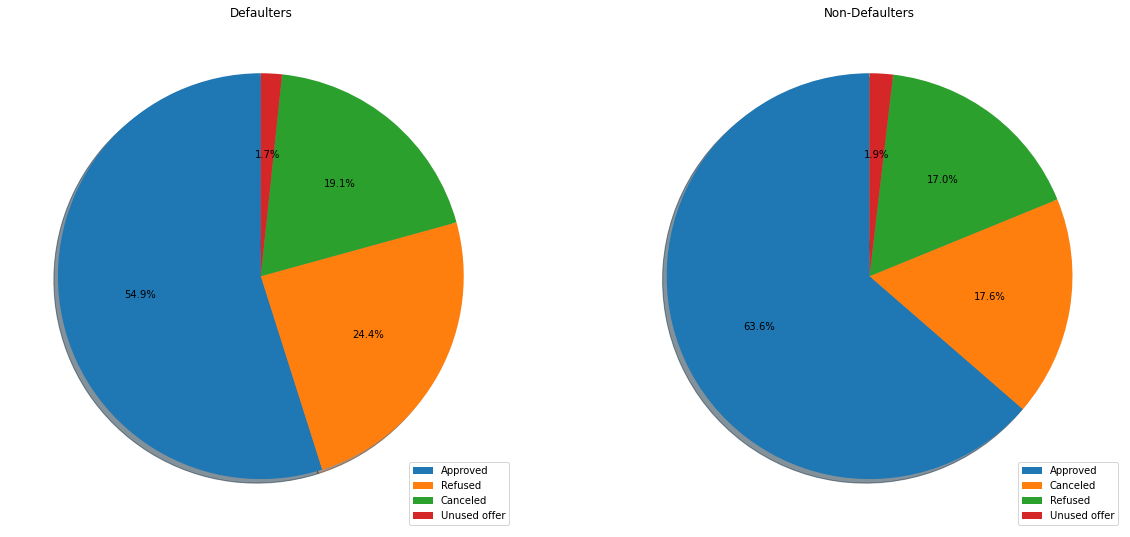

In [47]:
# Plot on a pie chart
plot_pie_merge("NAME_CONTRACT_STATUS_PREV")

### <font color=purple>Inference</font>
<font color=Teal>The percentage of applications from defaulters being refused is higher than that of the non-defaulters.
The percentage of applications from non-defaulters being approved is higher than that of the defaulters.</font>

NAME_CONTRACT_TYPE

In [48]:
# Check values of NAME_CONTRACT_TYPE
data_merge.NAME_CONTRACT_TYPE_PREV.value_counts()

Consumer loans     518114
Cash loans         464428
Revolving loans    136032
Name: NAME_CONTRACT_TYPE_PREV, dtype: int64

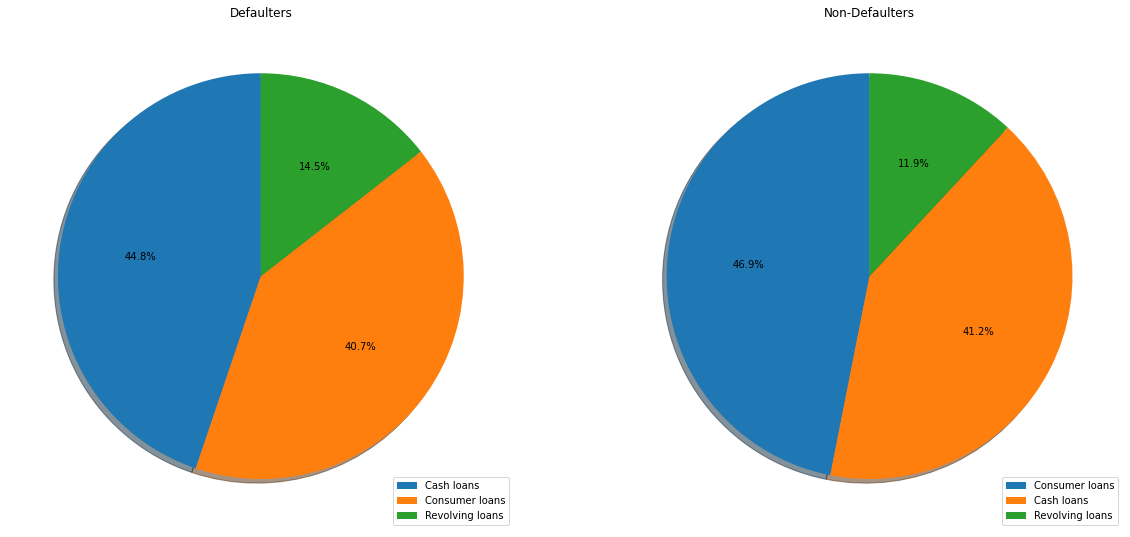

In [49]:
# Plot on a pie chart
plot_pie_merge("NAME_CONTRACT_TYPE_PREV")

### <font color=purple>Inference</font>
<font color=Teal>The percentages of applications from defaulters for cash loans and revolving loans were higher than those of the non-defaulters.

The percentage of applications from non-defaulters for consumer loans was higher than that of the defaulters.</font>

CLIENT TYPES

Was the client old or new client when applying for the previous application.



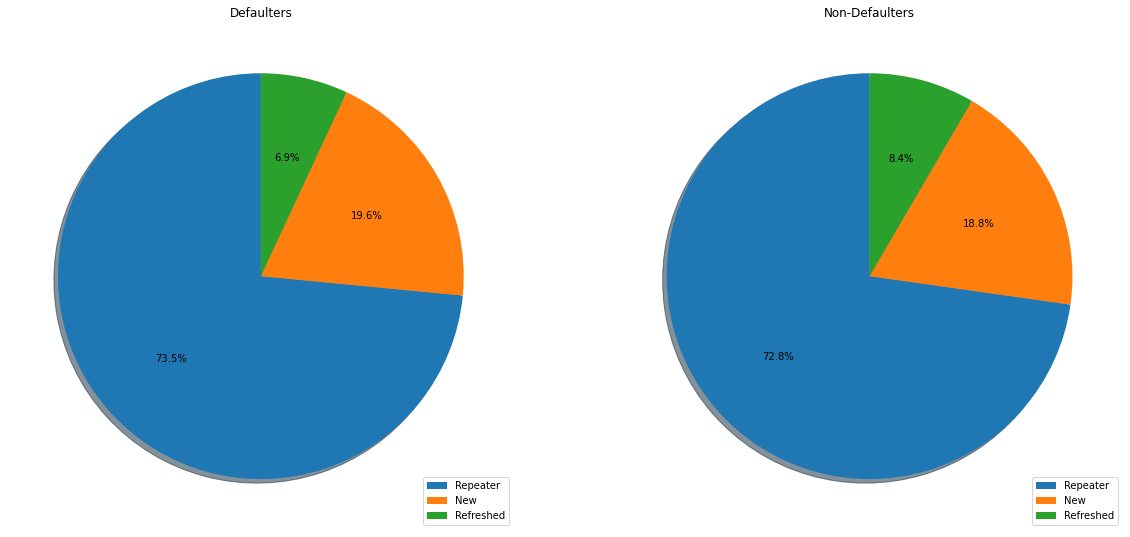

In [50]:
# Plot on a pie chart
plot_pie_merge("NAME_CLIENT_TYPE_PREV")


### <font color=purple>Inference</font>
<font color=Teal>The percentages of defaulters previous applications from new and repeaters clients were higher than those of the non-defaulters.

The percentage of non-defaulters previous applications from refreshed clients was higher than those of the defaulters.</font>

NAME_CASH_LOAN_PURPOSE



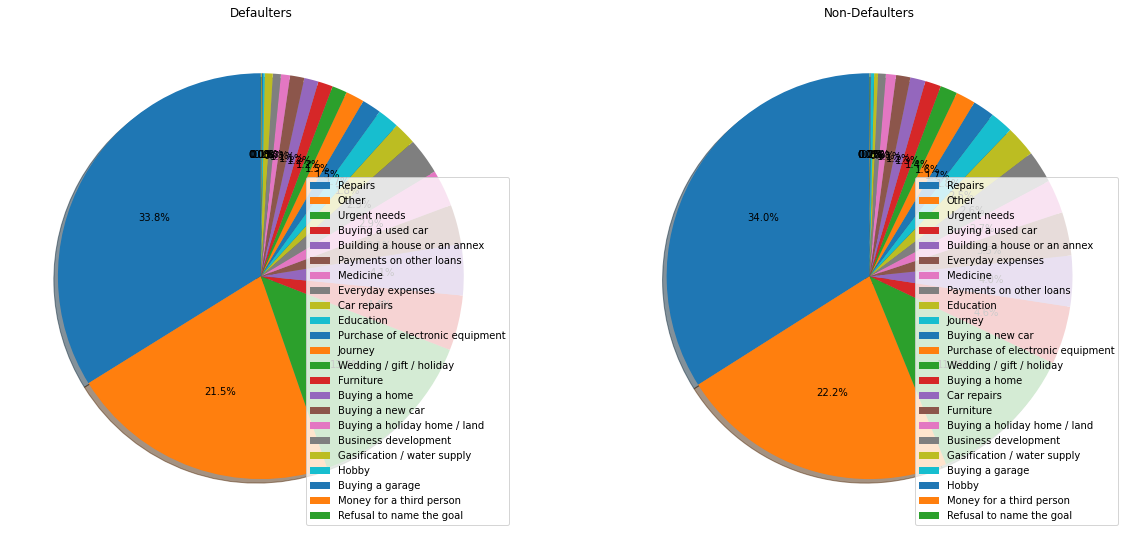

In [51]:
# Plot on a pie chart
plot_pie_merge("NAME_CASH_LOAN_PURPOSE_PREV")

### <font color=purple>Inference</font>
<font color=Teal>The percentages of defaulters previous applications refused to name the goal were higher than those of the non-defaulters.</font>

<font color = green>Univariate Analysis (Continuous)


In [52]:
# Check all columns again to find categorical data
data_merge.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118864 entries, 0 to 1118863
Data columns (total 115 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATIO

In [53]:
# Function to plot univariate

def plot_univariate_displot(variable):
    
    # Get data
    data_0 = data_merge[data_merge['TARGET']==0][variable]
    data_1 = data_merge[data_merge['TARGET']==1][variable]

    # Plot on charts
    plt.figure(figsize=(10,5))

    # Use distplot from seaborn
    labels = ['Defaulters', 'Non-Defaulters']
    plt.title('Distribution Plot')
    sns.distplot(data_1,label='Defaulters')
    sns.distplot(data_0,label='Non-Defaulters')
    plt.legend(labels, loc="center right")

    plt.show()


Credit Amount



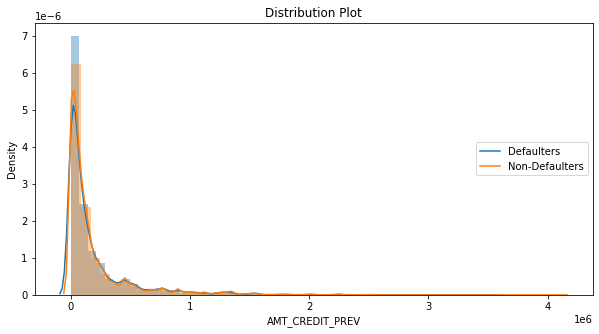

In [54]:
# Distribution and Box plot for 'AMT_CREDIT'
plot_univariate_displot('AMT_CREDIT_PREV')

### <font color=purple>Inference</font>
<font color=Teal>There were some outliers. Most of the amount of the credit was less than 500000. The pattern is the quite similar for defaulters and non-defaulters.</font>



Annuity Amount

For how much credit did client ask on the previous application?





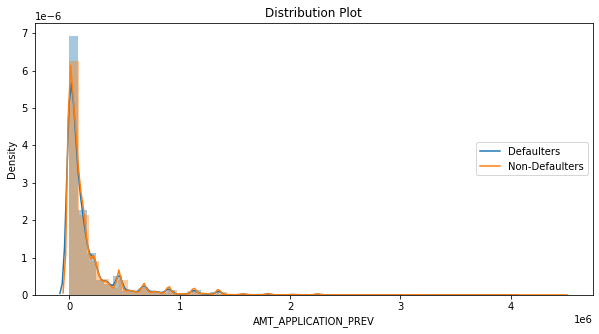

In [55]:
# Distribution and Box plot for 'AMT_APPLICATION'
plot_univariate_displot('AMT_APPLICATION_PREV')

### <font color=purple>Inference</font>
<font color=Teal>Similar to the amount of credit, there were some outliers. Most of the amount of the annuity was less than 50000. The pattern is the quite similar for defaulters and non-defaulters.</font>

Goods Price Amount



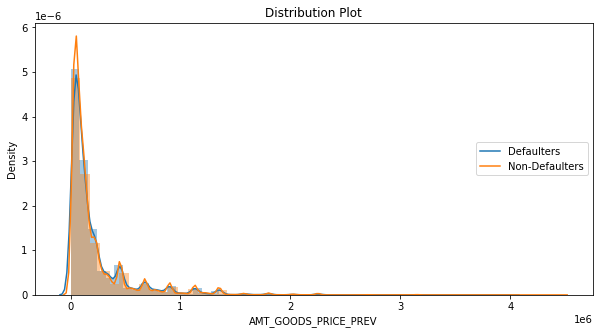

In [56]:
# Distribution and Box plot for 'AMT_GOODS_PRICE'
plot_univariate_displot('AMT_GOODS_PRICE_PREV')

### <font color=purple>Inference</font>
<font color=Teal>Similar to the credit amount, there were some outliers. Most of the amount of the credit was less than 500000. The pattern is the quite similar for defaulters and non-defaulters.

</font>

<font color = green>Bivariate Analysis (Categorical vs Categorical Variables)



In [57]:
# Check all columns again to find variables
data_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118864 entries, 0 to 1118863
Data columns (total 115 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATIO

In [58]:
# Function to countplot categorical variables
def countplot_bivariate(variable_1,variable_2):
    
    # Get data
    target_0 = data_merge[data_merge['TARGET']==0]
    target_1 = data_merge[data_merge['TARGET']==1]
    
    # Plot
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters')
    sns.countplot(x=variable_1,hue=variable_2,data=target_1,palette='Set1')

    plt.subplot(1,2,2)    
    plt.title('Non-Defaulters')
    sns.countplot(x=variable_1,hue=variable_2,data=target_0,palette='Set1')

    plt.show()

Previous Contract & Gender



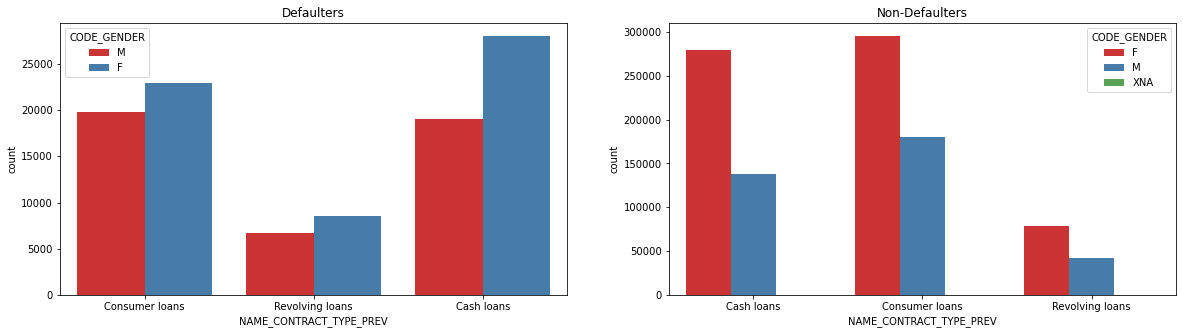

In [59]:
# Call the countplot function
countplot_bivariate('NAME_CONTRACT_TYPE_PREV','CODE_GENDER')

### <font color=purple>Inference</font>
<font color=Teal>Similar to current loans, for both Defaulters and non-Defaulters, there are more females having all types of previous contracts.</font>

Contract types & statuses



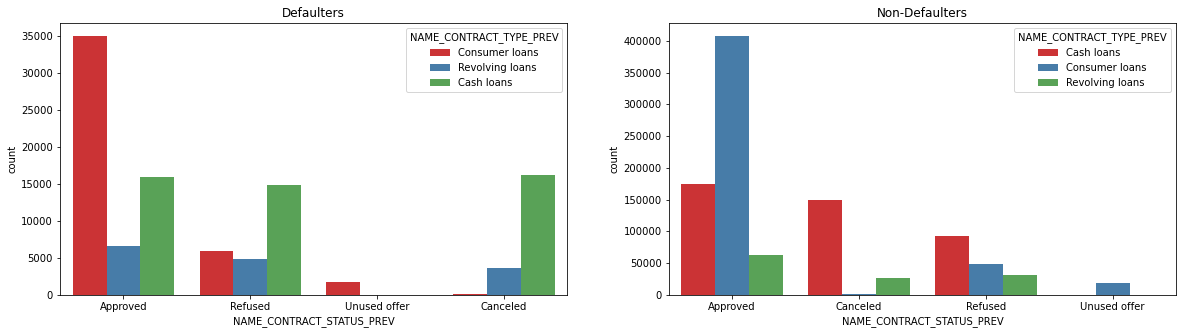

In [60]:
# Call the countplot function
countplot_bivariate('NAME_CONTRACT_STATUS_PREV','NAME_CONTRACT_TYPE_PREV')

### <font color=purple>Inference</font>
<font color=Teal>There is no significant insight from here.

</font>

<font color = green>Bivariate Analysis (Categorical vs Continuous Variables)



In [61]:
# Check all columns again to find variables
data_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118864 entries, 0 to 1118863
Data columns (total 115 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATIO

In [62]:
# Function to boxplot bivariate
def boxplot_bivariate(variable_1,variable_2):
    
    # Get data
    target_0 = data_merge[data_merge['TARGET']==0]
    target_1 = data_merge[data_merge['TARGET']==1]
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters')
    sns.boxplot(x=variable_1,y=variable_2,data=target_1)
    
    plt.subplot(1,2,2)    
    plt.title('Non-Defaulters')
    sns.boxplot(x=variable_1,y=variable_2,data=target_0)
    
    plt.show()


Previous Contract Status & Amount of credit



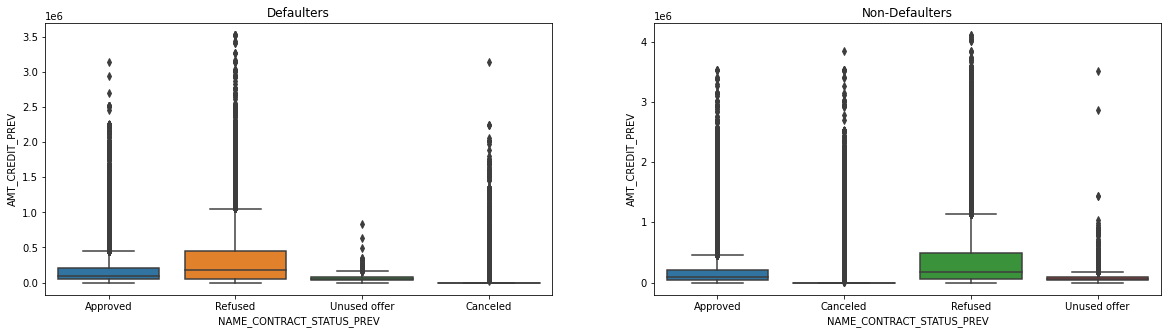

In [63]:
# Call the boxplot function
boxplot_bivariate('NAME_CONTRACT_STATUS_PREV','AMT_CREDIT_PREV')


### <font color=purple>Inference</font>
<font color=Teal>Similar for both defaulters and non-defaulters, applications being refused had higher credits.

</font>

Previous Contract Status & Amount of credit clients asked for



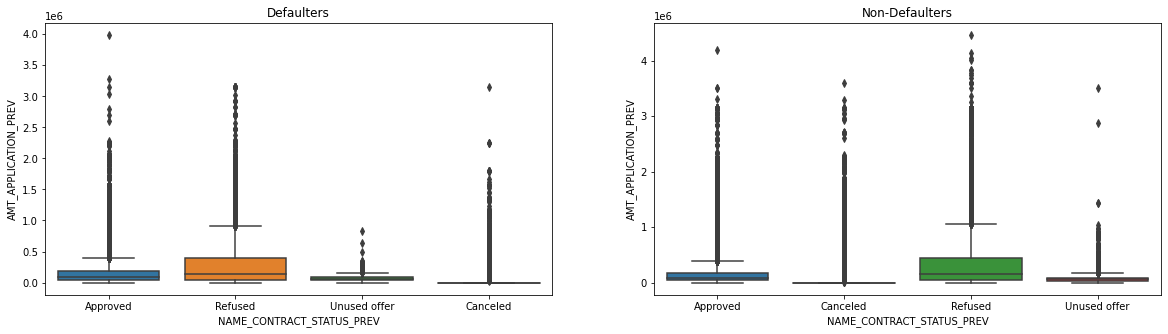

In [64]:
# Call the boxplot function
boxplot_bivariate('NAME_CONTRACT_STATUS_PREV','AMT_APPLICATION_PREV')

### <font color=purple>Inference</font>
<font color=Teal>Similar for both defaulters and non-defaulters, applications being refused had higher credits.

</font>

Money-related variables together



<font color = green>Bivariate Analysis  (Continuous vs Continuous Variables)



In [65]:
target_0 = data_merge[data_merge['TARGET']==0]
target_1 = data_merge[data_merge['TARGET']==1]

In [66]:
# Check all columns again to find variables
data_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118864 entries, 0 to 1118863
Data columns (total 115 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    SK_ID_CURR                        int64  
 1    TARGET                            int64  
 2    NAME_CONTRACT_TYPE                object 
 3    CODE_GENDER                       object 
 4    FLAG_OWN_CAR                      object 
 5    FLAG_OWN_REALTY                   object 
 6    CNT_CHILDREN                      int64  
 7    AMT_INCOME_TOTAL                  float64
 8    AMT_CREDIT                        float64
 9    AMT_ANNUITY                       float64
 10   AMT_GOODS_PRICE                   float64
 11   NAME_TYPE_SUITE                   object 
 12   NAME_INCOME_TYPE                  object 
 13   NAME_EDUCATION_TYPE               object 
 14   NAME_FAMILY_STATUS                object 
 15   NAME_HOUSING_TYPE                 object 
 16   REGION_POPULATIO

A number of continuous variables together



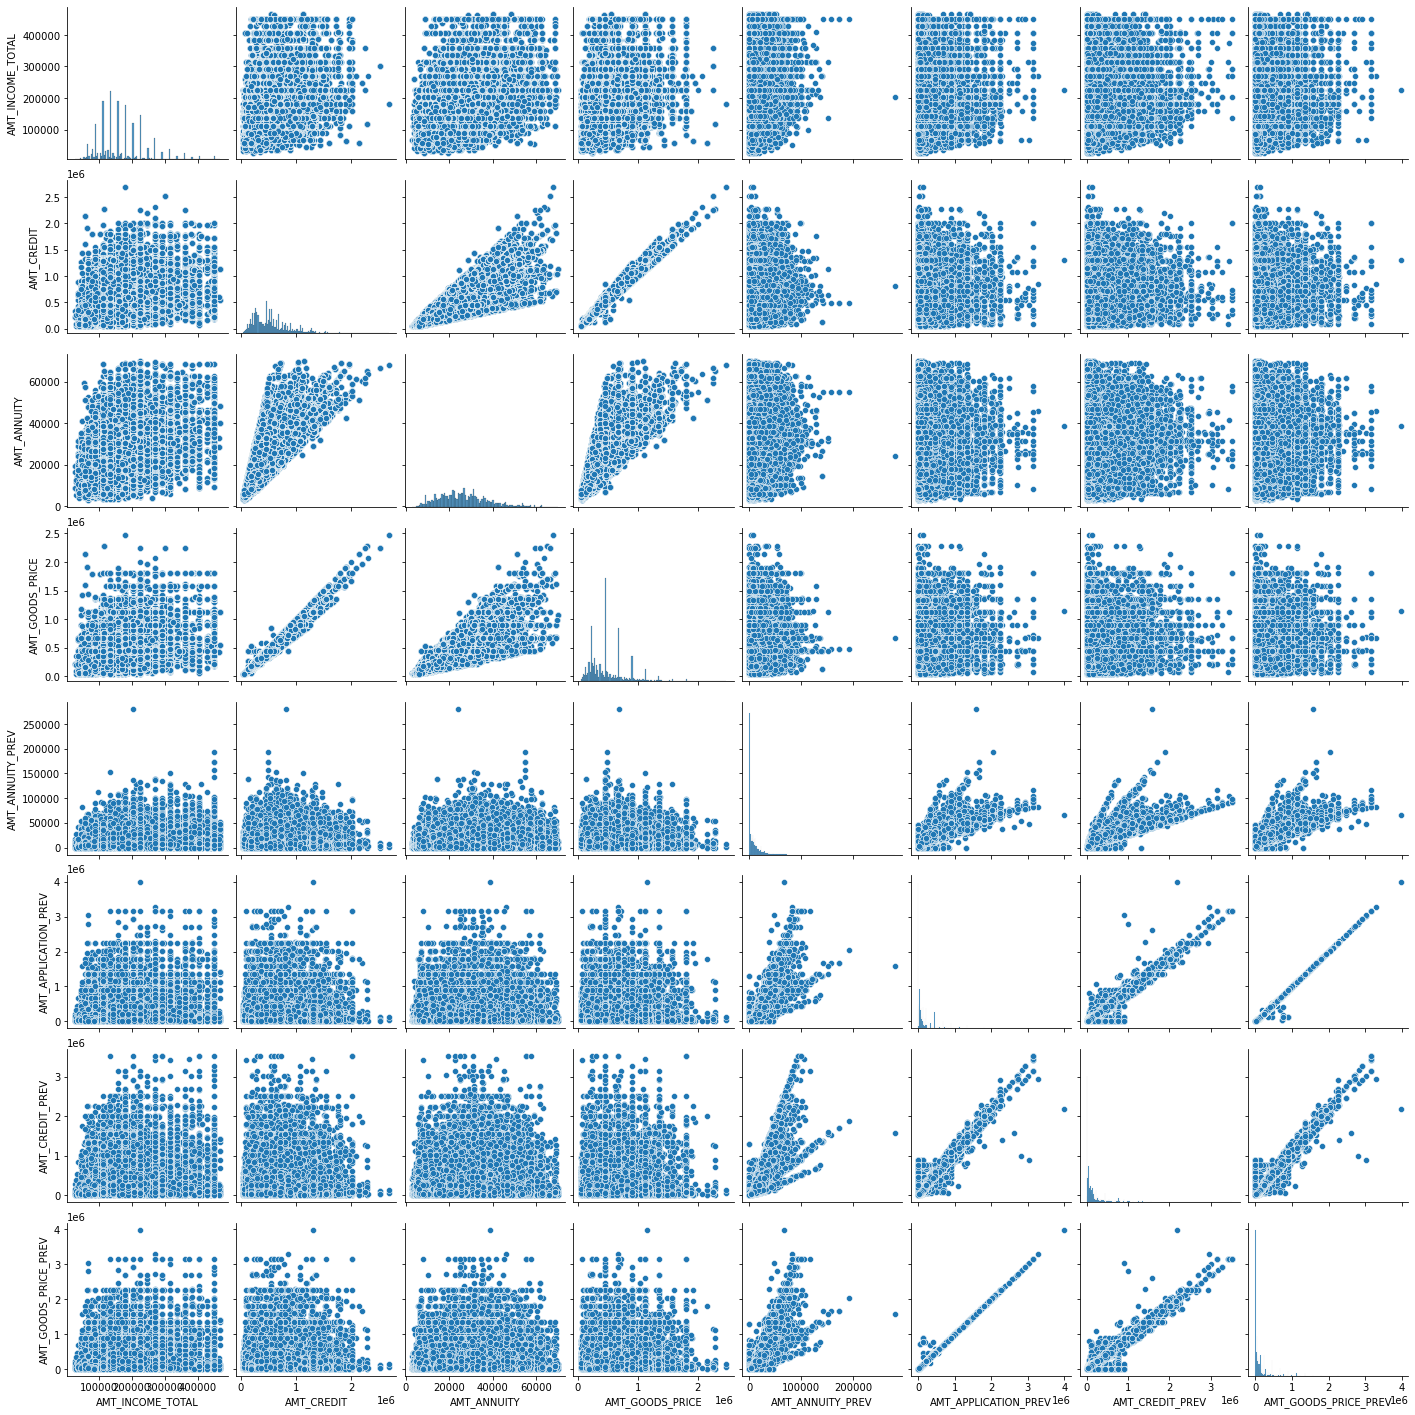

In [67]:
#Pairplot for Defaulters
pair = target_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION_PREV', 'AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].fillna(0)
sns.pairplot(pair)
plt.show()

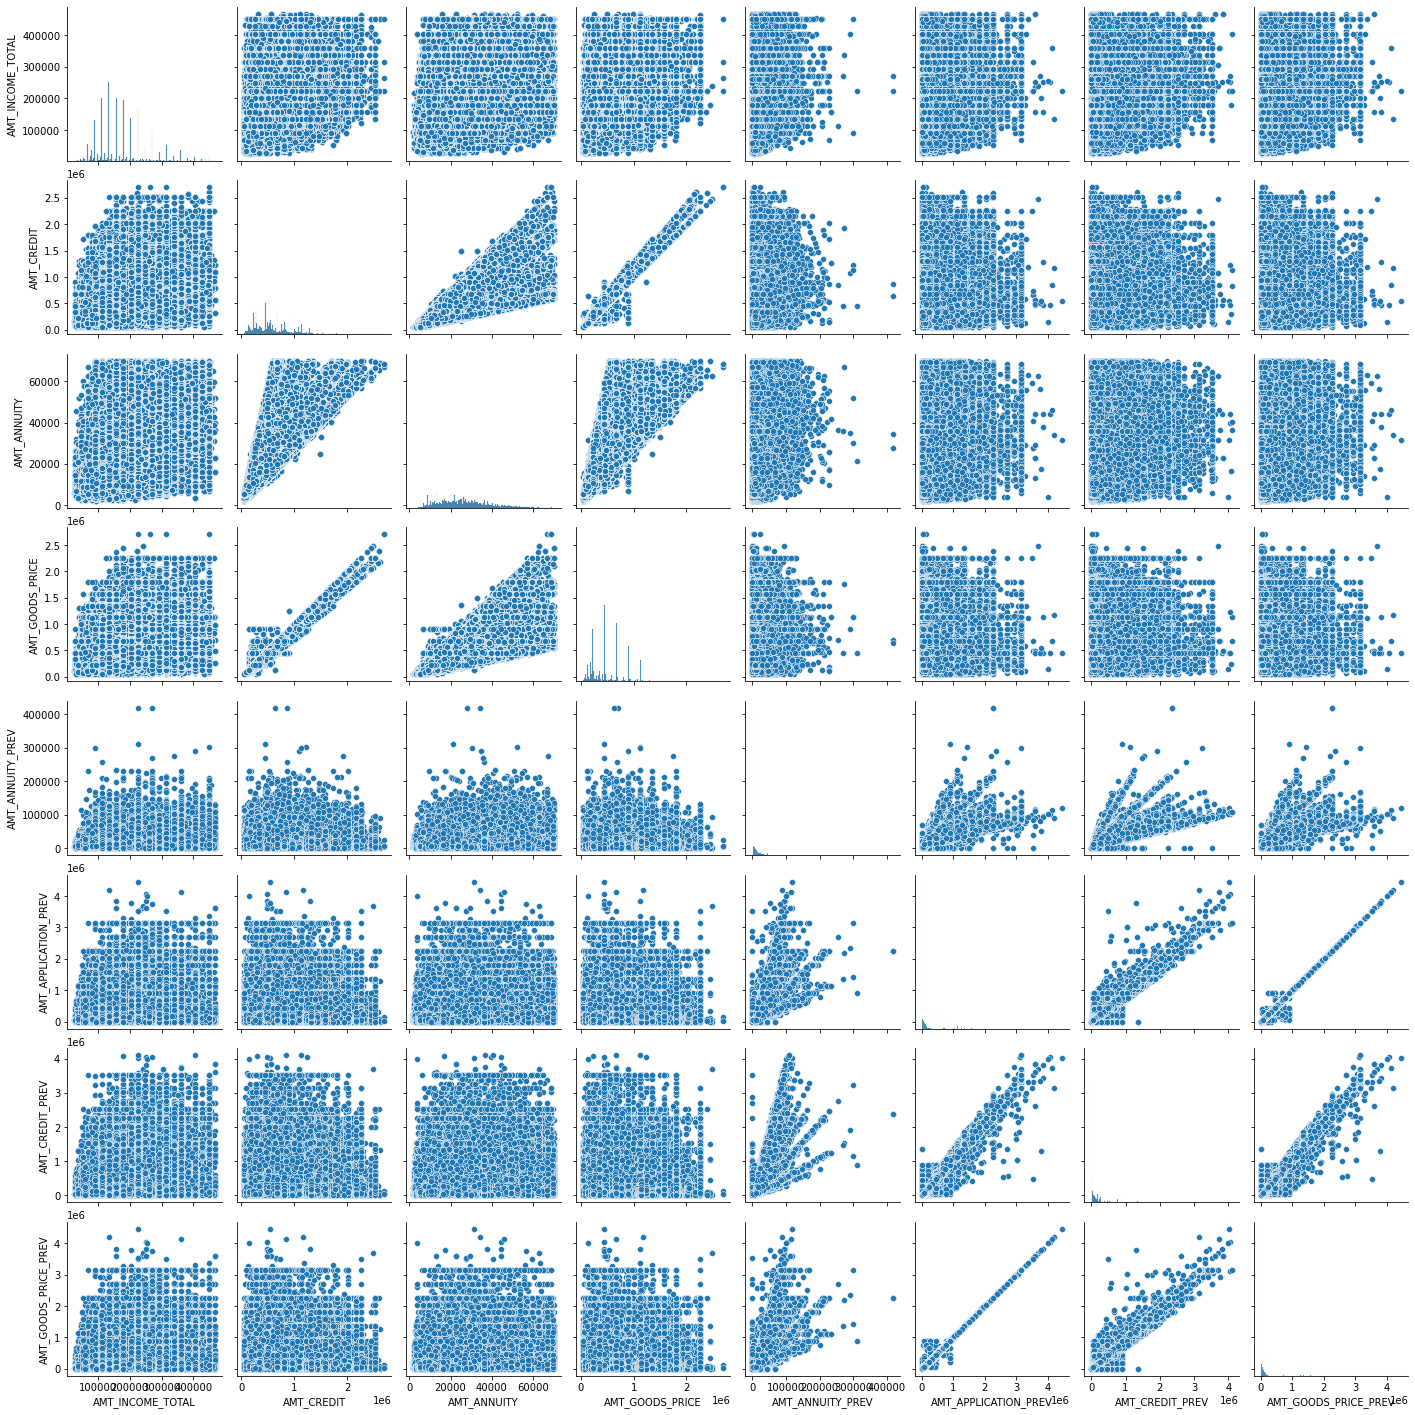

In [68]:
    #Pairplot for Non Defaulters
pair = target_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION_PREV', 'AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].fillna(0)
sns.pairplot(pair)
plt.show()

### <font color=purple>Inference</font>
<font color=Teal>From the pair plots above, it can be seen that there is a high correlation between credit amount and goods price. Similarly, there are a high correlation between previous credit amount and previous goods price and a high correlation between previous credit applied by clients and previous goods price.

</font>

### <font color = darkblue> Find correlation between different variables


Correlation for clients with payment difficulties (Defaulters)


In [69]:
# Correlation between variables
corr_target_1 = round(target_1.corr(),2)
corr_target_1

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AGE  SK_ID_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION_PREV  AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV  HOUR_APPR_PROCESS_START_PREV  NFLAG_LAST_APPL_IN_DAY_PREV  DAYS_DECISION_PREV  SELLERPLACE_AREA_PREV  CNT_PAYMENT_PREV  \
SK_ID_CURR                            1.00     NaN         -0.00             -0.01       -0.00        -0.01             0.00                       -0.01          -0.01               0.00            -0.00            -0.00                 -0.00                        -0.00                     0.00          0.01         -0.00                         0.01           0.01                          0.01            0.01                          0.01            0.01            0.00                      0.01                      0.02                      0.01                      0.00                   -0.01                       -0.01                      -0.01                       -0.00                       0.01                      -0.00                        0.01  0.01        0.00             -0.00                 -0.00            -0.00                 -0.00                         -0.00                        -0.00               -0.00                  -0.00             -0.00   
TARGET                                 NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN            NaN                NaN              NaN              NaN                   NaN                          NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN   NaN         NaN               NaN                   NaN              NaN                   NaN                           NaN                          NaN                 NaN                    NaN               NaN   
CNT_CHILDREN                         -0.00     NaN          1.00             -0.03       -0.01         0.02            -0.01                       -0.02           0.05               0.13            -0.08             0.90                  0.04                         0.04                    -0.02         -0.02         -0.01                         0.01          -0.02                          0.01           -0.02                          0.01           -0.02           -0.02                      0.02                      0.01                      0.02                      0.01                    0.02                        0.01                      -0.01                        0.01                      -0.03                      -0.02                       -0.04 -0.22       -0.00             -0.04                 -0.02            -0.03                 -0.04                         -0.01                        -0.01               -0.01                   0.01             -0.03   
AMT_INCOME_TOTAL                     -0.01     NaN         -0.03        

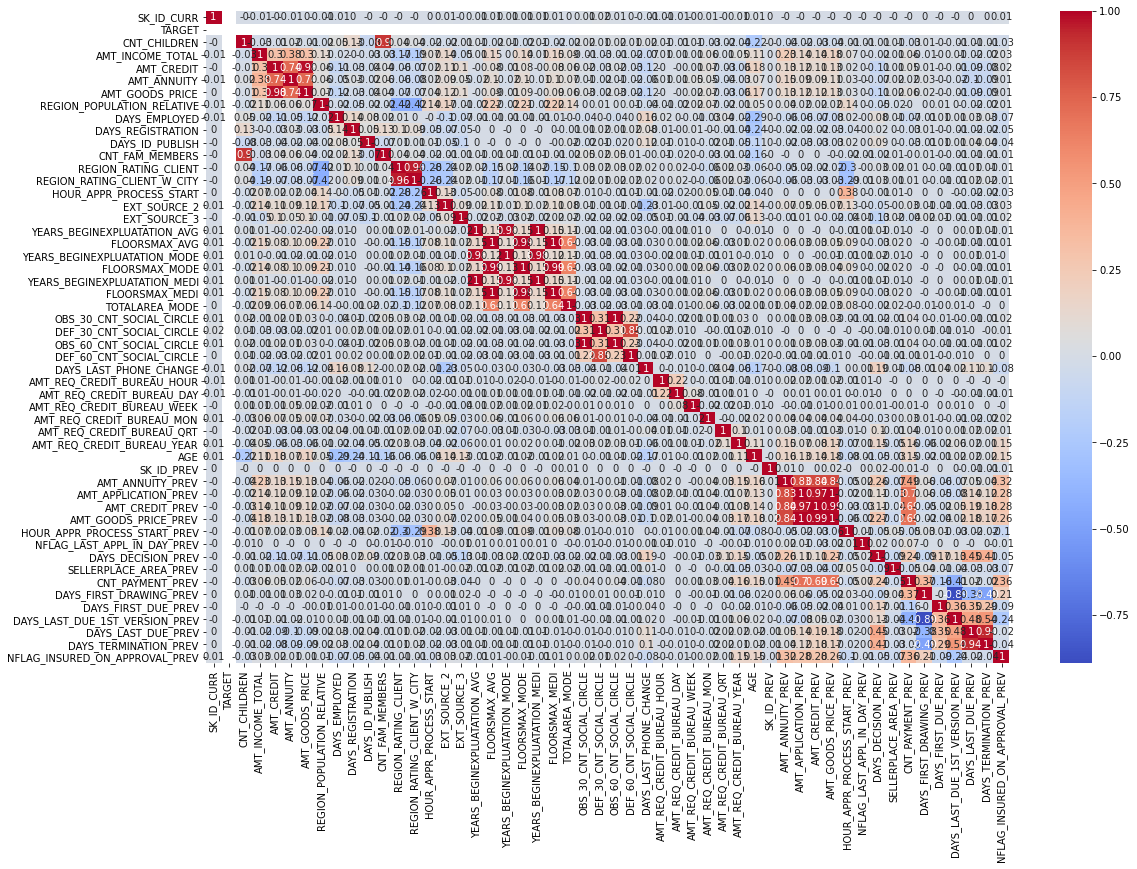

In [70]:
# Plot heatmap to identify the correlation between different variables in the dataset for Defaulters - Clients with payment difficulties
plt.figure(figsize = (18,12))
sns.heatmap(corr_target_1, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

In [71]:
# Remove duplicated pairs in the correlation table
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    corr_list = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    corr_list = corr_list.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_list[0:n]


In [72]:
print("The top 10 correlation pairs for Defaulters are:")
get_top_abs_correlations(corr_target_1, 10)

The top 10 correlation pairs for Defaulters are:


AMT_APPLICATION_PREV          AMT_GOODS_PRICE_PREV            1.00
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    1.00
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        1.00
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  1.00
AMT_CREDIT_PREV               AMT_GOODS_PRICE_PREV            0.99
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.99
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.99
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.98
AMT_CREDIT                    AMT_GOODS_PRICE                 0.98
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.98
dtype: float64

Top 10 Correlation for other clients (Non Defaulters)


In [73]:
# Correlation between variables
corr_target_0 = round(target_0.corr(),2)
corr_target_0

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AGE  SK_ID_PREV  AMT_ANNUITY_PREV  AMT_APPLICATION_PREV  AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV  HOUR_APPR_PROCESS_START_PREV  NFLAG_LAST_APPL_IN_DAY_PREV  DAYS_DECISION_PREV  SELLERPLACE_AREA_PREV  CNT_PAYMENT_PREV  \
SK_ID_CURR                            1.00     NaN         -0.00              0.00       -0.00        -0.00            -0.00                        0.00           0.00              -0.00             0.00            -0.00                  0.00                        -0.00                     0.00          0.00         -0.00                         0.00          -0.00                          0.01           -0.00                          0.00           -0.00           -0.00                      0.00                      0.00                      0.00                      0.00                   -0.00                       -0.00                      -0.00                       -0.00                       0.00                      -0.00                        0.00  0.00        0.00             -0.00                 -0.00            -0.00                 -0.00                          0.00                        -0.00               -0.00                   0.00             -0.00   
TARGET                                 NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN            NaN                NaN              NaN              NaN                   NaN                          NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN   NaN         NaN               NaN                   NaN              NaN                   NaN                           NaN                          NaN                 NaN                    NaN               NaN   
CNT_CHILDREN                         -0.00     NaN          1.00             -0.02       -0.02        -0.00            -0.02                       -0.03           0.07               0.17            -0.11             0.89                  0.04                         0.04                    -0.03         -0.03         -0.02                         0.01          -0.02                          0.00           -0.02                          0.00           -0.02           -0.02                      0.02                      0.00                      0.02                      0.00                    0.01                       -0.00                      -0.00                        0.00                      -0.02                      -0.01                       -0.06 -0.28       -0.00             -0.05                 -0.04            -0.04                 -0.05                         -0.01                         0.00               -0.01                   0.00             -0.04   
AMT_INCOME_TOTAL                      0.00     NaN         -0.02        

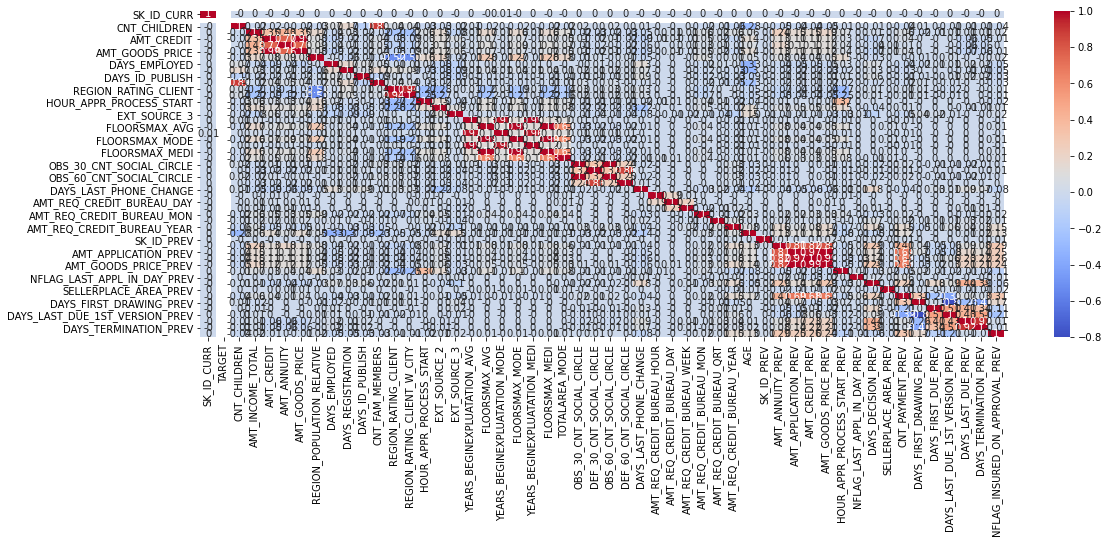

In [74]:
# Plot heatmap to identify the correlation between different variables in the dataset for Defaulters - Clients with payment difficulties
plt.figure(figsize = (18,6))
sns.heatmap(corr_target_0, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

In [75]:
print("Top 10 correlation pairs for Non Defaulters are:")
get_top_abs_correlations(corr_target_0, 10)

Top 10 correlation pairs for Non Defaulters are:


OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        1.00
FLOORSMAX_AVG                FLOORSMAX_MEDI                  1.00
AMT_APPLICATION_PREV         AMT_GOODS_PRICE_PREV            1.00
AMT_CREDIT_PREV              AMT_GOODS_PRICE_PREV            0.99
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.99
FLOORSMAX_MODE               FLOORSMAX_MEDI                  0.99
AMT_CREDIT                   AMT_GOODS_PRICE                 0.99
FLOORSMAX_AVG                FLOORSMAX_MODE                  0.99
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE    0.97
AMT_APPLICATION_PREV         AMT_CREDIT_PREV                 0.97
dtype: float64

### <font color=purple>Inference</font>
<font color=Teal>Conclusion - Driving factors:

Loan Clients in general:
    
    Laborers occupation
    Secondary education
    Married people
    Middle age
    Low income
    Applied the loans for goods price less than 2,000,000
    
    
Defaulters:
    
    More clients with low income
    More adults and young adults
    More single people
    Secondary education
    More ‘Refused’ previous applications
    More ‘Revolving Loans’ previous applications
    
    
Non-Defaulters:
    
    More clients with high income
    More middle-age clients and seniors
    More married people
    Higher education
    More ‘approved’ previous applications
    More ‘Consumer Loans' previous applications

</font>